In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np

import csv
%matplotlib inline


In [4]:
#common variables

PROCCESSEDDATA = 'output/output_3.csv'


In [5]:
TAGS = ['google-app-maker', 'appian', 'outsystems', 'zoho', 'mendix',
        'powerapps', 'quickbase', 'vinyl', 'salesforce-lightning', 'github-copilot','Knack','Airtable']

#machine learning
TAGS += ['machine-learning','classification','nlp','anomaly-detection','machine-translation','']

#low-code
TAGS += ['editor','wysiwyg','automation', 'ui-automation','']

PLATFORMS = {
    'Salesforce' : ['salesforce-lightning', 'lwc', 'lightning', 'salesforce-communities',
        'salesforce-chatter', 'salesforce-service-cloud', 'aura-framework'],
    'Appian' : ['appian'],
    'Outsystems' : ['outsystems'],
    'AppMaker' : ['google-app-maker'],
    'Zoho' : ['zoho'],
    'Mendix' : ['mendix'],
    'PowerApps' : ['powerapps', 'powerapps-formula',
        'powerapps-selected-items', 'powerapps-collection', 'powerapps-canvas'],
    'QuickBase' : ['quickbase'],
    'Vinyl' : ['vinyl']
}


In [6]:
so_df = pd.read_csv(PROCCESSEDDATA)
so_df.CreationDate = so_df.CreationDate.apply(pd.to_datetime)
so_df.AcceptedAnswerCreationDate = so_df.AcceptedAnswerCreationDate.apply(pd.to_datetime)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
print(so_df.sort_values(by='CreationDate').iloc[0].CreationDate)
so_df.sort_values(by='CreationDate').head(5)

2008-08-04 18:51:38.543000


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,LastEditDate,...,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense,AcceptedAnswer,AcceptedAnswerCreationDate
0,1496,1,1517.0,NaN,2008-08-04 18:51:38.543,NaN,34,9592,<p>For those of us that like to use the graphi...,2019-07-24T14:44:27.110,...,What are the preferred versions of Vim and Ema...,<macos><vim><emacs><editor>,13,0,6.0,2012-08-03T16:38:59.173,NaN,CC BY-SA 4.0,<p><strong>MacVim</strong> works well and cert...,2008-08-04 19:11:02.140
1,2898,1,2905.0,NaN,2008-08-05 21:42:37.763,NaN,51,129039,<p>Let me preface this question by saying I us...,2012-07-28T00:24:43.417,...,Text Editor For Linux (Besides Vi)?,<linux><editor>,34,2,19.0,2014-05-28T07:41:58.517,2009-05-03T11:37:34.303,CC BY-SA 2.5,<p>Emacs is a wonderful text editor. It has h...,2008-08-05 21:49:12.180
2,10475,1,10479.0,NaN,2008-08-13 23:29:38.707,NaN,26,7864,<p>Since the keyboard is <strong>the</strong> ...,2008-09-11T02:13:53.970,...,Touch Typing Software recommendations,<editor><touch-typing>,14,1,25.0,2012-03-01T06:12:03.993,NaN,CC BY-SA 2.5,"<p><a href=""http://en.wikipedia.org/wiki/Typin...",2008-08-13 23:32:27.560
416,10564,1,773973.0,NaN,2008-08-14 01:43:04.270,NaN,595,353209,<p>I'm trying out <strong>Git on Windows</stro...,2016-12-24T17:26:04.737,...,How can I set up an editor to work with Git on...,<windows><git><cygwin><editor>,35,7,288.0,NaN,NaN,CC BY-SA 2.5,<p>Update September 2015 (6 years later)</p>\n...,2009-04-21 18:34:54.007
2192,11462,1,4500707.0,NaN,2008-08-14 18:30:01.160,NaN,21,19961,"<p>Ok, I've seen a few posts that <em>mention<...",2014-12-09T14:01:56.880,...,Sharepoint Wikis,<sharepoint><automation><sharepoint-wiki>,17,0,6.0,NaN,NaN,CC BY-SA 3.0,"<p>Before the rant, here is my overall experie...",2010-12-21 15:13:23.837


# Stats per tag

In [8]:
sum = 0
no_of_questions = []
avg_view_count = []
avg_fav_count = []
for tag in TAGS:
    indicesToRemove = []
    for i in range(len(so_df)):
        qtags = so_df.iloc[i]['Tags'][1:-1].replace('><', ' ').split()
        f = True
        for qtag in qtags:
            if qtag == tag:
                f = False
                break
        if f:
            indicesToRemove.append(i)
    temp_df = so_df.drop(index=indicesToRemove)
    no_of_questions.append(len(temp_df))
    avg_view_count.append(temp_df.ViewCount.mean())
    avg_fav_count.append(temp_df.FavoriteCount.mean())
    sum += len(temp_df)
print(sum)
df = pd.DataFrame()
df['Tag_Name'] = TAGS
df['Num_of_Questions'] = no_of_questions
df['Avg_View_Count'] = avg_view_count
df['Avg_Fav_Count'] = avg_fav_count

df = df.dropna()
df

37229


,Tag_Name,Num_of_Questions,Avg_View_Count,Avg_Fav_Count
0,google-app-maker,451,452.991131,1.052632
1,appian,6,215.166667,3.000000
2,outsystems,78,1461.666667,1.200000
3,zoho,157,1764.044586,1.700000
4,mendix,16,1812.187500,1.500000
5,powerapps,267,1793.127341,0.911765
6,quickbase,33,630.969697,1.000000
7,vinyl,17,384.823529,1.000000
8,salesforce-lightning,144,1675.409722,0.913043
12,machine-learning,16535,3211.512549,4.161964


# Stats per platform

In [9]:
sum = 0
no_of_questions = []
no_of_accepted_answers = []
avg_view_count = []
avg_fav_count = []
avg_score = []
for platform in PLATFORMS:
    indicesToRemove = []
    for i in range(len(so_df)):
        qtags = so_df.iloc[i]['Tags'][1:-1].replace('><', ' ').split()
        f = True
        for qtag in qtags:
            for ptag in PLATFORMS[platform]:
                if qtag == ptag:
                    f = False
                    break
        if f:
            indicesToRemove.append(i)
    temp_df = so_df.drop(index=indicesToRemove)
    no_of_questions.append(len(temp_df))
    no_of_accepted_answers.append(temp_df.AcceptedAnswer.count())
    avg_view_count.append(temp_df.ViewCount.mean())
    avg_fav_count.append(temp_df.FavoriteCount.mean())
    avg_score.append(temp_df.Score.mean())
    sum += len(temp_df)
print(sum)
df = pd.DataFrame()
df['Platform'] = PLATFORMS.keys()
df['Num_of_Questions'] = no_of_questions
df['Num_of_Accepted_Answers'] = no_of_accepted_answers
df['Avg_View_Count'] = avg_view_count
df['Avg_Fav_Count'] = avg_fav_count
df['Avg_Score'] = avg_score

df

1169


,Platform,Num_of_Questions,Num_of_Accepted_Answers,Avg_View_Count,Avg_Fav_Count,Avg_Score
0,Salesforce,144,144,1675.409722,0.913043,0.680556
1,Appian,6,6,215.166667,3.000000,1.000000
2,Outsystems,78,78,1461.666667,1.200000,1.012821
3,AppMaker,451,451,452.991131,1.052632,0.558758
4,Zoho,157,157,1764.044586,1.700000,1.522293
5,Mendix,16,16,1812.187500,1.500000,1.625000
6,PowerApps,267,267,1793.127341,0.911765,0.838951
7,QuickBase,33,33,630.969697,1.000000,0.424242
8,Vinyl,17,17,384.823529,1.000000,3.235294


# Topic modeling related figures

In [10]:
TOPIC_ID_LOW_CATEGORY = {
    0 : 'Action Classification',
    1 : 'Logic Construction',
    2 : 'Deployment',
    3 : 'Context Creation',
    4 :	'User Experience',
    5 : 'User Interfacing',
    6 :	'Resource Management',
    7 : 'Automation',
    8 : 'Database',
    9 : 'Workflow',
    10 : 'Integration'
}

HIGHER_CAT_TO_TOPIC_ID = {
    'Database' : [8,3,1],
    'Automation' : [9,0,7,2],
    'Integration' : [10,4,6, 5]
}

In [11]:
SAMPLING = '3MS'
DUMMY_DATE = pd.to_datetime('2008-11-27 18:18:37.777')

final_df = so_df.resample(SAMPLING, on='CreationDate').count()[['Id']].astype(int)
final_df.columns = ['Total']

print(final_df.head())
NUM_TOPICS = 11

for category in HIGHER_CAT_TO_TOPIC_ID:
    idsToRetain = []
    for topic_id in HIGHER_CAT_TO_TOPIC_ID[category]:
        temp_df = pd.read_csv(f'./output/Topic Modeling Results/{NUM_TOPICS} Topics/TopicToPost/{topic_id}/Questions.csv')
        idsToRetain.extend(temp_df.link.tolist())

    temp_df = so_df[so_df['Id'].isin(idsToRetain)]
    total_question = len(temp_df)

    temp_df = temp_df.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)

    temp_df = temp_df.resample(SAMPLING, on = 'CreationDate').count()[['Id']]

    temp_df.columns = [category]

    final_df = pd.merge(final_df,temp_df, how='left', on='CreationDate', validate='one_to_one')

    print("Category: " + category + " total question: " + str(total_question))

final_df.fillna(0, inplace=True)
final_df = final_df.astype('int64')

# integrity check
for i in range(len(final_df)):
    sum = 0
    for category in HIGHER_CAT_TO_TOPIC_ID:
        sum += final_df.iloc[i][category]
    if(final_df.iloc[i].Total != sum):
        print('Failed')

final_df = final_df[-30:]
print(final_df.head())

              Total
CreationDate       
2008-08-01      166
2008-11-01      141
2009-02-01      153
2009-05-01      220
2009-08-01      222
Category: Database total question: 3566
Category: Automation total question: 10740
Category: Integration total question: 20817
              Total  Database  Automation  Integration
CreationDate                                          
2013-05-01      539        45         149          345
2013-08-01      529        62         166          301
2013-11-01      596        59         198          339
2014-02-01      612        56         236          320
2014-05-01      557        68         170          319


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


DatetimeIndex(['2013-05-01', '2013-08-01', '2013-11-01', '2014-02-01',
               '2014-05-01', '2014-08-01', '2014-11-01', '2015-02-01',
               '2015-05-01', '2015-08-01', '2015-11-01', '2016-02-01',
               '2016-05-01', '2016-08-01', '2016-11-01', '2017-02-01',
               '2017-05-01', '2017-08-01', '2017-11-01', '2018-02-01',
               '2018-05-01', '2018-08-01', '2018-11-01', '2019-02-01',
               '2019-05-01', '2019-08-01', '2019-11-01', '2020-02-01',
               '2020-05-01', '2020-08-01'],
              dtype='datetime64[ns]', name='CreationDate', freq=None)
<class 'module'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


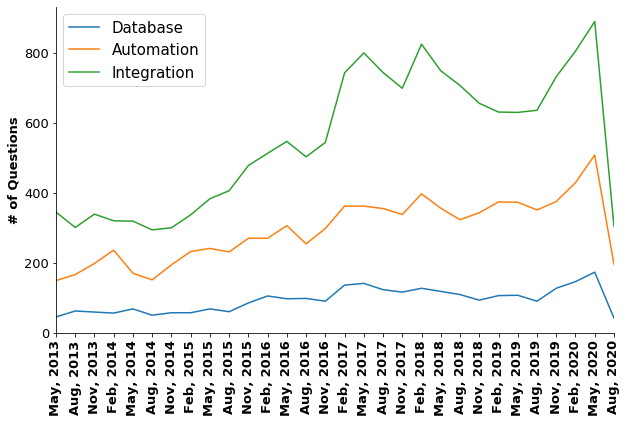

In [12]:
font_size = 13
ax = final_df.drop(columns='Total').plot(figsize=(10,6), fontsize=font_size)
# plt.xlabel('Year')
ax1 = plt.axes()
ax1.xaxis.label.set_visible(False)

plt.ylabel('# of Questions', weight='bold', size=font_size)
print(final_df.index)
print(type(plt))
print(type(final_df.index[0]))


# ax.set_xticklabels(['xyz 2009','xyz 2011','xyz 2013','xyz 2015','xyz 2017','xyz 2019', 'Jan 2021'], rotation=0)
labels = [x.strftime("%b, %Y") for x in final_df.index]
ax.set_xticks(labels)
ax.set_xticklabels(labels, rotation=90, weight = 'bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(fontsize='x-large')
ax.legend(fontsize=font_size + 2)

# plt.grid()
# plt.savefig('Question_per_higher_category_2.png', dpi=1000, bbox_inches = "tight")
plt.savefig('output/Question_per_higher_category_3M.pdf', dpi=1000, bbox_inches = "tight")
# plt.savefig('Question_per_higher_category.eps', format='eps', dpi=1000, bbox_inches = "tight")

plt.show()


In [13]:
TOTAL_POSTS = len(so_df) + so_df.AcceptedAnswer.count()
number_of_posts = []
percentage_of_posts = []
avg_view = []
avg_favorite = []
avg_score = []
pct_questions_without_accepted_answer = []
median_hours_to_get_accepted_answer = []

for topic_id in TOPIC_ID_LOW_CATEGORY:
    idsToRetain = []
    temp_df = pd.read_csv(f'./output/Topic Modeling Results/11 Topics/TopicToPost/{topic_id}/Questions.csv')
    idsToRetain.extend(temp_df.link.tolist())
    temp_ans_df = pd.read_csv(f'./output/Topic Modeling Results/11 Topics/TopicToPost/{topic_id}/Answers.csv')
    temp_df = so_df[so_df['Id'].isin(idsToRetain)]
    post_cnt = len(temp_df) + len(temp_ans_df)
    number_of_posts.append(post_cnt)
    percentage_of_posts.append(round(((post_cnt/TOTAL_POSTS)*100.0), 2))
    avg_view.append(round(temp_df.ViewCount.mean(), 2))
    avg_favorite.append(round(temp_df.FavoriteCount.mean(), 2))
    avg_score.append(round(temp_df.Score.mean(), 2))
    pct_questions_without_accepted_answer.append(
        round((((len(temp_df)-temp_df.AcceptedAnswer.count())/len(temp_df))*100.0), 2))
    # median hours
    temp_median_df = temp_df[temp_df['AcceptedAnswer'].notnull(
    )][['CreationDate', 'AcceptedAnswerCreationDate']]
    temp_median_df['Diff_Hour'] = (
                                          temp_median_df.AcceptedAnswerCreationDate - temp_median_df.CreationDate) / pd.Timedelta(hours=1)
    median_hours_to_get_accepted_answer.append(
        round(temp_median_df.Diff_Hour.median(), 2))
    # print(len(temp_df), len(questions_with_accepted_answers))

df = pd.DataFrame()
df['Topic_ID'] = TOPIC_ID_LOW_CATEGORY.keys()
df['Topic_Name'] = TOPIC_ID_LOW_CATEGORY.values()
df['Number_of_Posts(Q+A)'] = number_of_posts
df['Percentage_of_Posts'] = percentage_of_posts
df['Averege_View'] = avg_view
df['AVerege_Favorite'] = avg_favorite
df['Averege_Score'] = avg_score
df['Median_Hours_To_Get_Accepted_Answer'] = median_hours_to_get_accepted_answer
df.to_csv('Stats_Topic_Modeling_Low_Level.csv', index=False)
df

,Topic_ID,Topic_Name,Number_of_Posts(Q+A),Percentage_of_Posts,Averege_View,AVerege_Favorite,Averege_Score,Median_Hours_To_Get_Accepted_Answer
0,0,Action Classification,3728,5.31,4443.55,4.24,4.65,2.58
1,1,Logic Creation,2128,3.03,3676.13,4.99,5.58,4.09
2,2,Deployment,3053,4.35,3754.96,4.46,4.71,2.52
3,3,Context Creation,2518,3.58,3542.09,3.74,3.72,2.79
4,4,User Experience,8124,11.57,3925.36,4.60,3.97,2.17
5,5,User Interfacing,14951,21.28,3216.28,4.01,3.73,2.66
6,6,Resource Management,15791,22.48,4407.25,4.46,4.30,4.58
7,7,Automation,5110,7.27,3287.88,4.27,3.52,3.64
8,8,Database,2863,4.08,5817.47,5.76,6.34,1.37
9,9,Workflow,9769,13.91,2730.59,4.05,3.91,3.77


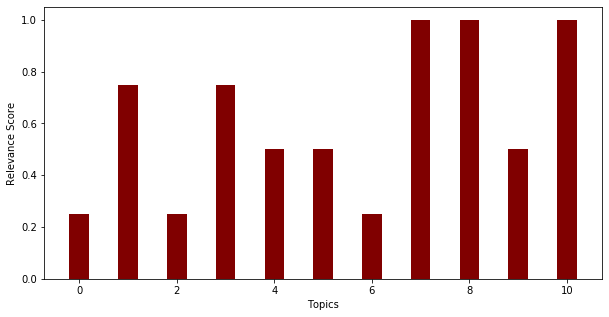

In [34]:
# topic relevance distributions

data = {
    0:0.25,
    1:0.75,
    2:0.25,
    3:0.75,
    4:0.5,
    5:0.5,
    6:0.25,
    7:1,
    8:1,
    9:0.5,
    10:1,
}
topics = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(topics, values, color ='maroon',
        width = 0.4)

plt.xlabel("Topics")
plt.ylabel("Relevance Score")

plt.savefig('output/RelevanceScores.pdf',dpi=1000, bbox_inches = "tight")

plt.show()

